In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Linear Regression\Modular\Linear-Regression\data\hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [3]:
df.shape

(5000, 3)

In [4]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

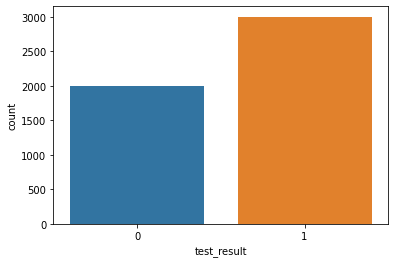

In [5]:
sns.countplot(data=df,x = 'test_result')

<AxesSubplot:xlabel='test_result', ylabel='age'>

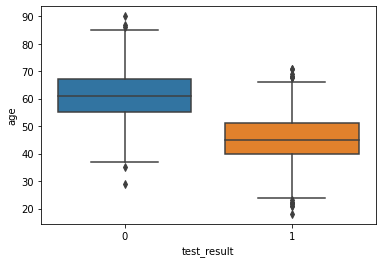

In [6]:
##plt.figure(dpi=150)
sns.boxplot(x='test_result',y='age',data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

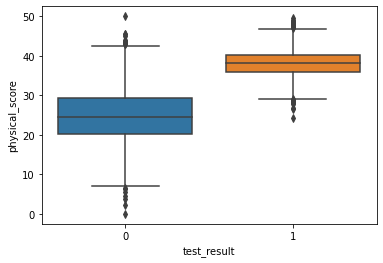

In [7]:
sns.boxplot(x='test_result',y='physical_score',data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

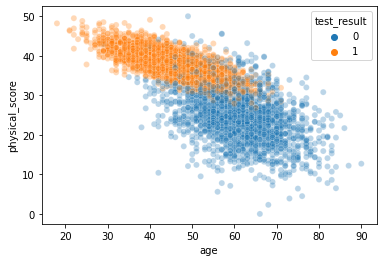

In [8]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result',alpha=0.3)

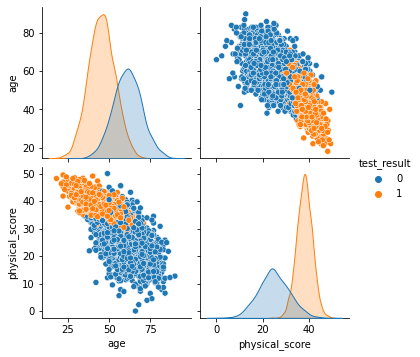

In [9]:
sns.pairplot(data=df,hue='test_result')

<AxesSubplot:>

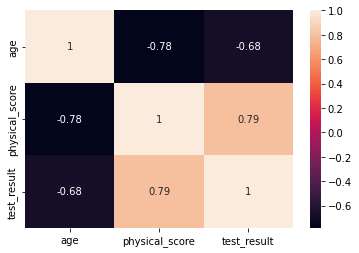

In [10]:
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

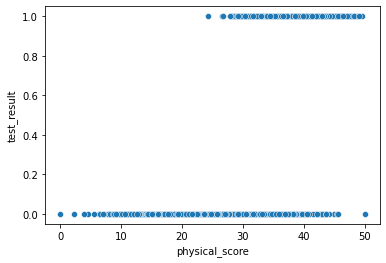

In [11]:
## we never prefer scatterplot when it comes to discrete classes
sns.scatterplot(x ='physical_score', y = 'test_result', data =df)

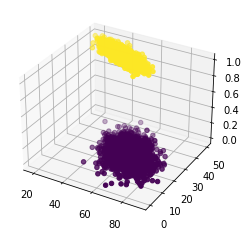

In [12]:
## plot 3-d scatterplot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c= df['test_result'])

## Training the Model

In [13]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [14]:
#separating the features

X =df.drop('test_result', axis = 1)
X.head()

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9


In [15]:
y = df['test_result']

In [16]:
from sklearn.model_selection import train_test_split
df.shape

(5000, 3)

In [17]:
## we are taking 10% of the data as testing data because our dataset is small if we try to check the rows
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_model = LogisticRegression()

In [22]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [23]:
## (Sign of Coefficients)scroll up and check heat map u will find age had negative correlation so it indicates 
#-- that there is a decrease in the likelihood of belonging to the class 1 
## (Magnitude of Coefficients) as physical_score has a  positive correlation with magnitude 3.4  it 
## --  tells how much strong predictor of likelihood of belonging to class 1 as compared to the feature with less theata value
## Conclusion: Age is not a good predictor whereas physical_score is a good predictor
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [24]:
y_pred = log_model.predict(scaled_X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [25]:
## want to check 1 value
y_pred[0]

1

In [26]:
## verifying output
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [27]:
##y_pred = log_model.predict_proba(scaled_X_test)
##y_pred

In [28]:
X_test.head()

,age,physical_score
1718,39.0,37.8
2511,45.0,38.7
345,56.0,21.8
2521,40.0,44.0
54,64.0,25.4


In [29]:
y_test.head()

1718    1
2511    1
345     0
2521    1
54      0
Name: test_result, dtype: int64

## Classification Metrics

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred)


0.93

In [38]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

C:\Users\91706\anaconda3\envs\linearRegressionsample\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


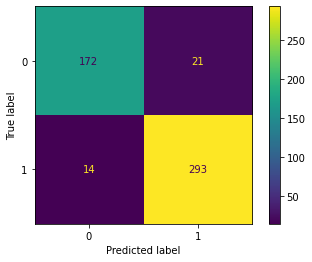

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_model, scaled_X_test, y_test)

In [ ]:
## support basically means how many values belong to class 0 and 
# how many values belong to class 1 out of total y_pred(500) values
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [34]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_pred, y_test)

0.9543973941368078

In [35]:
recall_score(y_pred, y_test)

0.9331210191082803

C:\Users\91706\anaconda3\envs\linearRegressionsample\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


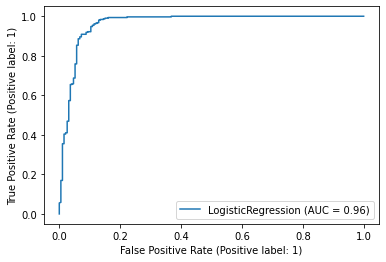

In [36]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
plot_roc_curve(log_model, scaled_X_test, y_test)

C:\Users\91706\anaconda3\envs\linearRegressionsample\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


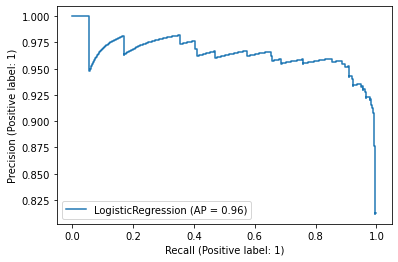

In [37]:
plot_precision_recall_curve(log_model, scaled_X_test, y_test)